In [10]:
import modules.plots as plots
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import json


In [4]:
EXPERIMENT_NAME = "model-test"
PROFILE_NAME = "one-layer-sum"
DIR = f"./experiments/{EXPERIMENT_NAME}/{PROFILE_NAME}"

In [5]:
# Load train stats and results json
with open(f"{DIR}/model/train_stats.json") as f:
    train_stats = json.load(f)

with open(f"{DIR}/results/results.json") as f:
    results = json.load(f)

# Load posterior samples
baseline_normal_samples = np.loadtxt(f"{DIR}/results/baseline_normal_samples.csv", delimiter=",")
data_samples = np.loadtxt(f"{DIR}/results/data_samples.csv", delimiter=",")
pred_samples = np.loadtxt(f"{DIR}/results/predictive_samples.csv", delimiter=",")

print(baseline_normal_samples.shape)
print(np.min(baseline_normal_samples), np.max(baseline_normal_samples))
print(data_samples.shape)
print(np.min(data_samples), np.max(data_samples))
print(pred_samples.shape)
print(np.min(pred_samples), np.max(pred_samples))


(1000, 20)
-3.879523515701294 3.765073537826538
(1000, 20)
-607.864501953125 642.4573364257812
(1000, 20)
-1578.7244873046875 1701.1478271484375


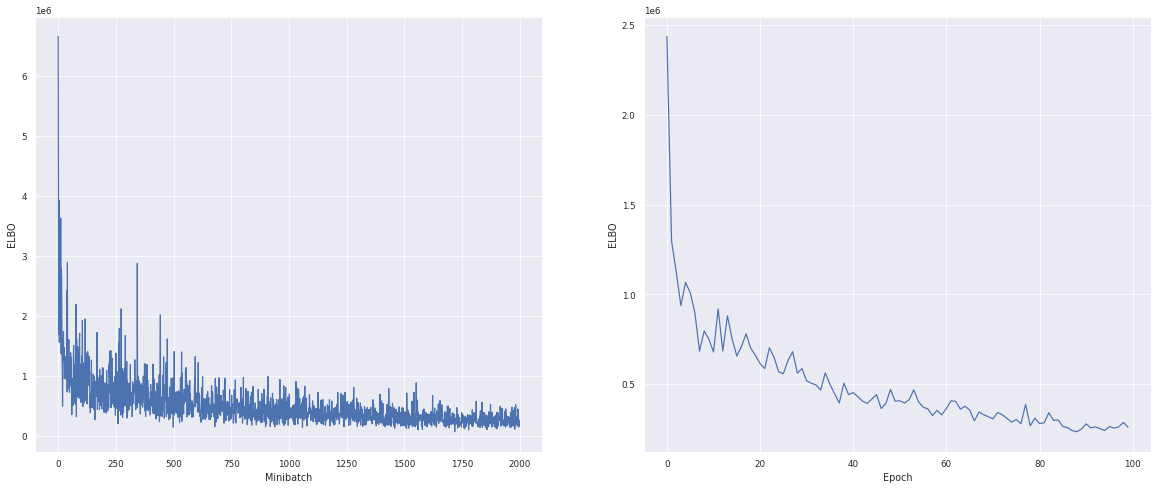

In [25]:
# Plot elbo with seaborn
def lineplot(data, x_label=None, y_label=None, figsize=(10, 5), ax=None, save_path=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)

    sns.lineplot(data=data, ax=ax)
    
    if ax is None:
        ax.set_ylabel(y_label)
        ax.set_xlabel(x_label)
    else:
        ax.set_ylabel("")
        ax.set_xlabel("")
    
    if save_path:
        plt.savefig(save_path)

def plot_elbo(train_stats, save_path=None, figsize=(20, 8)):
    sns.set_style("darkgrid")
    sns.set_context("paper")

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    fig.tight_layout()
    fig.suptitle("ELBO", fontsize=15)
    
    lineplot(train_stats["elbo_minibatch"], ax=ax[0])
    ax[0].set_ylabel("ELBO")
    ax[0].set_xlabel("Minibatch")

    lineplot(train_stats["elbo_epoch"], ax=ax[1])
    ax[1].set_ylabel("ELBO")
    ax[1].set_xlabel("Epoch")

    if save_path:
        plt.savefig(save_path)

plot_elbo(train_stats)

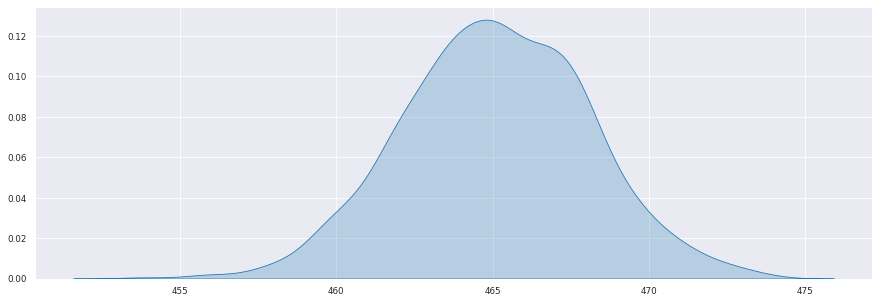

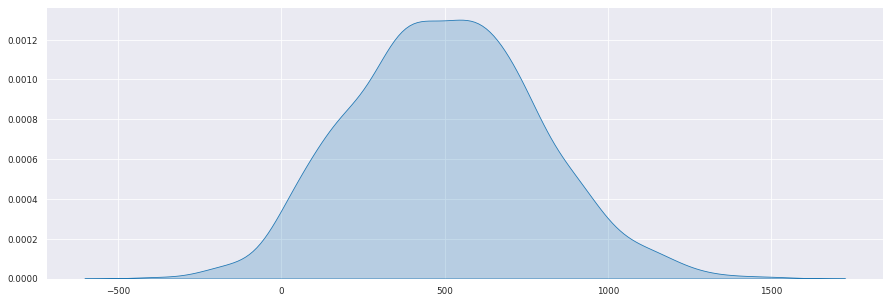

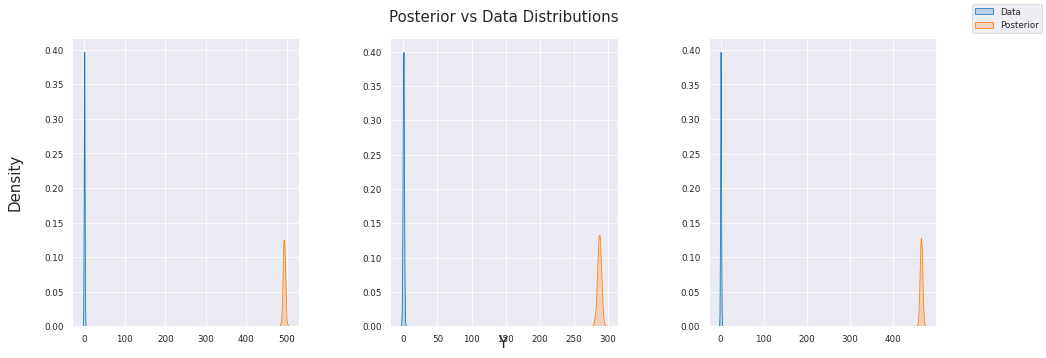

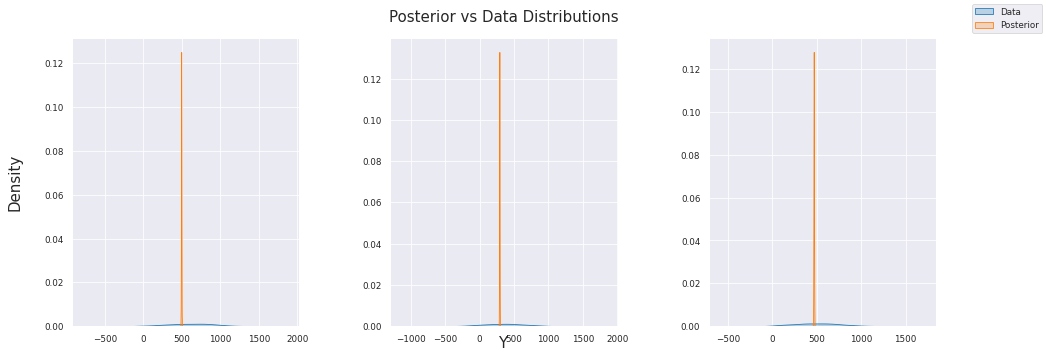

In [4]:
plots.plot_distribution(data_samples[:, 2], figsize=(15, 5))
plots.plot_distribution(pred_samples[:, 2], figsize=(15, 5))

plots.plot_comparison_grid(baseline_normal_samples, data_samples, grid_size=(1, 3), figsize=(15, 5))
plots.plot_comparison_grid(pred_samples, data_samples, grid_size=(1, 3), figsize=(15, 5))